In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [131]:
# Load your dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv("Data/Model Data/final_data.csv", index_col=0)
df.columns

Index(['game_id', 'season', 'week', 'team', 'opponent', 'score', 'home',
       'ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_team',
       'ewma_dynamic_window_passing_defense_team',
       'ewma_dynamic_window_rushing_offense_opp',
       'ewma_dynamic_window_passing_offense_opp',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp', 'team_id',
       'rest_differential', 'windy', 'div_game', 'spread_line',
       'implied_points', 'total_line', 'game_type', 'location', 'total'],
      dtype='object')

In [132]:
data = df[['score', 'ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp',
       'home', 'rest_differential', 'windy', 'div_game']]
data = data.dropna(inplace=False)

In [133]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['score'])  # Replace 'target_column' with the actual target column name
y = data['score']

In [134]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [136]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

In [137]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [138]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
40/40 [==============================] - 0s 717us/step - loss: 594.8066
Epoch 2/100
40/40 [==============================] - 0s 690us/step - loss: 506.9101
Epoch 3/100
40/40 [==============================] - 0s 665us/step - loss: 372.3484
Epoch 4/100
40/40 [==============================] - 0s 665us/step - loss: 224.4128
Epoch 5/100
40/40 [==============================] - 0s 639us/step - loss: 135.2393
Epoch 6/100
40/40 [==============================] - 0s 716us/step - loss: 111.0778
Epoch 7/100
40/40 [==============================] - 0s 665us/step - loss: 105.8233
Epoch 8/100
40/40 [==============================] - 0s 639us/step - loss: 103.3887
Epoch 9/100
40/40 [==============================] - 0s 665us/step - loss: 101.3326
Epoch 10/100
40/40 [==============================] - 0s 639us/step - loss: 99.9040
Epoch 11/100
40/40 [==============================] - 0s 639us/step - loss: 98.6030
Epoch 12/100
40/40 [==============================] - 0s 639us/step - loss: 

In [140]:
# Evaluate the model on the testing data
train_loss = model.evaluate(X_train, y_train, verbose=0)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Train Data: {train_loss}')
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Train Data: 83.4483871459961
Mean Squared Error on Test Data: 91.02770233154297


In [141]:
# Make predictions
predictions = model.predict(X_test)

10/10 [==============================] - 0s 554us/step


In [142]:
# Creating a df with the actual scores to merge back with the other data on index
frame = {'actual_score': y_test}
actuals = pd.DataFrame(frame)
actuals

,actual_score
585,35
303,0
1604,31
1286,15
91,28
...,...
1028,51
1198,8
541,27
90,10


In [143]:
merge_df = df[['game_id', 'season', 'week', 'team', 'opponent', 'spread_line', 'total_line', 'score', 'implied_points',]]
results = actuals.merge(merge_df, left_index = True, right_index = True)
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points
585,35,2021_02_KC_BAL,2021,2,KC,BAL,3.5,53.5,35,25.00
303,0,2020_11_DET_CAR,2020,11,DET,CAR,3.0,47.0,0,22.00
1604,31,2022_17_LA_LAC,2022,17,LAC,LA,6.5,41.5,31,17.50
1286,15,2022_06_NE_CLE,2022,6,CLE,NE,2.5,43.0,15,20.25
91,28,2020_03_TB_DEN,2020,3,TB,DEN,6.0,42.5,28,18.25
...,...,...,...,...,...,...,...,...,...,...
1028,51,2021_17_DET_SEA,2021,17,SEA,DET,8.5,41.5,51,16.50
1198,8,2022_03_PHI_WAS,2022,3,WAS,PHI,-6.0,47.0,8,26.50
541,27,2021_01_BAL_LV,2021,1,BAL,LV,3.0,50.5,27,23.75
90,10,2020_03_TB_DEN,2020,3,DEN,TB,-6.0,42.5,10,24.25


In [144]:
# Okay now adding in the predictions
results['prediction'] = predictions
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points,prediction
585,35,2021_02_KC_BAL,2021,2,KC,BAL,3.5,53.5,35,25.00,28.517736
303,0,2020_11_DET_CAR,2020,11,DET,CAR,3.0,47.0,0,22.00,25.625650
1604,31,2022_17_LA_LAC,2022,17,LAC,LA,6.5,41.5,31,17.50,22.636658
1286,15,2022_06_NE_CLE,2022,6,CLE,NE,2.5,43.0,15,20.25,23.447977
91,28,2020_03_TB_DEN,2020,3,TB,DEN,6.0,42.5,28,18.25,25.156467
...,...,...,...,...,...,...,...,...,...,...,...
1028,51,2021_17_DET_SEA,2021,17,SEA,DET,8.5,41.5,51,16.50,23.231474
1198,8,2022_03_PHI_WAS,2022,3,WAS,PHI,-6.0,47.0,8,26.50,21.447323
541,27,2021_01_BAL_LV,2021,1,BAL,LV,3.0,50.5,27,23.75,28.347162
90,10,2020_03_TB_DEN,2020,3,DEN,TB,-6.0,42.5,10,24.25,20.012026


In [145]:
# Comparing the errors
mse_vegas =  mean_squared_error(results.score, results.implied_points)
mse_model =  mean_squared_error(results.score, results.prediction)
print(f'Mean Squared Error - Vegas: {mse_vegas}')
print(f'Mean Squared Error - Model: {mse_model}')

Mean Squared Error - Vegas: 121.20680732484077
Mean Squared Error - Model: 91.02769858319665


10/10 [==============================] - 0s 665us/step


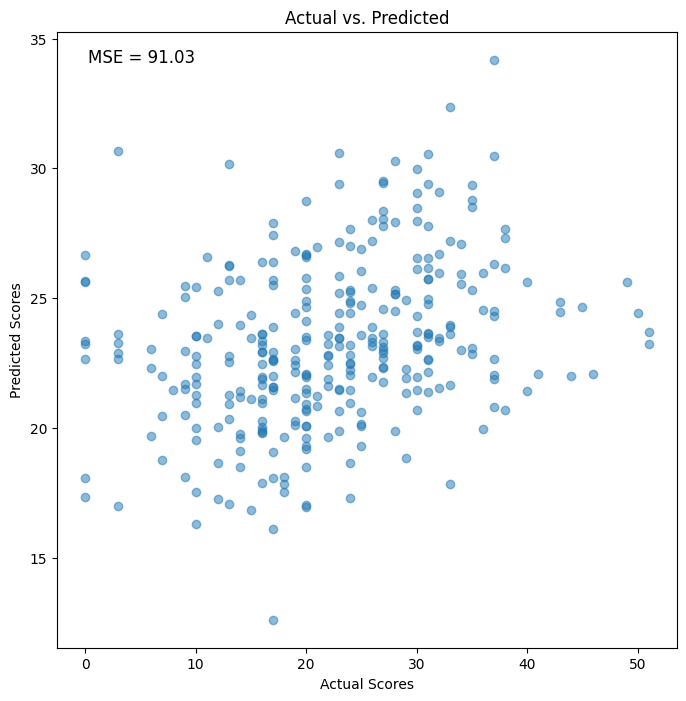

In [146]:
# Plotting results
import matplotlib.pyplot as plt

# Assuming you have trained the model and have predictions stored in 'y_pred'
y_pred = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_model:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()


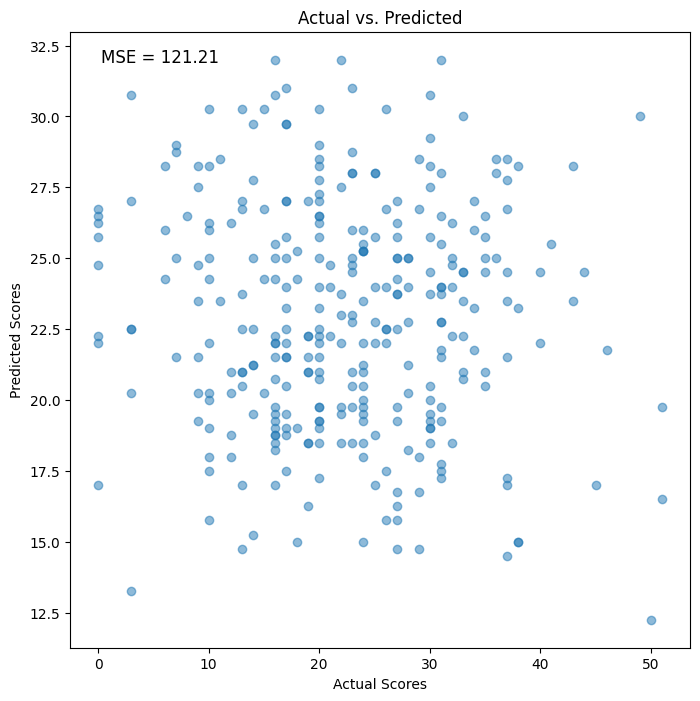

In [147]:
# Plotting results - Vegas
import matplotlib.pyplot as plt

# Getting implied points from above
vegas = results.implied_points

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, vegas, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_vegas:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()